In [ ]:
!mamba install obspy
!mamba install numpy
!mamba install matplotlib

In [10]:
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy.core import read, Stream
from obspy.geodetics import gps2dist_azimuth

In [11]:
host = 'https://examples.obspy.org/'
# Files (fmt: SAC)
files = ['TOK.2011.328.21.10.54.OKR01.HHN.inv',
         'TOK.2011.328.21.10.54.OKR02.HHN.inv',
         'TOK.2011.328.21.10.54.OKR03.HHN.inv',
         'TOK.2011.328.21.10.54.OKR04.HHN.inv',
         'TOK.2011.328.21.10.54.OKR05.HHN.inv',
         'TOK.2011.328.21.10.54.OKR06.HHN.inv',
         'TOK.2011.328.21.10.54.OKR07.HHN.inv',
         'TOK.2011.328.21.10.54.OKR08.HHN.inv',
         'TOK.2011.328.21.10.54.OKR09.HHN.inv',
         'TOK.2011.328.21.10.54.OKR10.HHN.inv']
# Earthquakes' epicenter
eq_lat = 35.565
eq_lon = -96.792

In [12]:
# Reading the waveforms
stream = Stream()
for waveform in files:
    stream += read(host + waveform)

In [13]:
stream

10 Trace(s) in Stream:
.OKR01..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR02..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR03..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR04..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR05..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR06..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR07..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR08..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR09..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
.OKR10..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 sampl

In [18]:
# Calculating distance from SAC headers lat/lon
# (trace.stats.sac.stla and trace.stats.sac.stlo)
for track in stream:
    # print(gps2dist_azimuth(
    #     track.stats.sac.stla, track.stats.sac.stlo, eq_lat, eq_lon))
    track.stats.distance = gps2dist_azimuth(
        track.stats.sac.stla, track.stats.sac.stlo, eq_lat, eq_lon)[0]
    # Setting Network name for plot title
    track.stats.network = 'TOK'

stream.filter('bandpass', freqmin=0.1, freqmax=10)


10 Trace(s) in Stream:
TOK.OKR01..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR02..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR03..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR04..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR05..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR06..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR07..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR08..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR09..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.995000Z | 200.0 Hz, 62000 samples
TOK.OKR10..HHN | 2011-11-24T21:10:54.000000Z - 2011-11-24T21:16:03.9

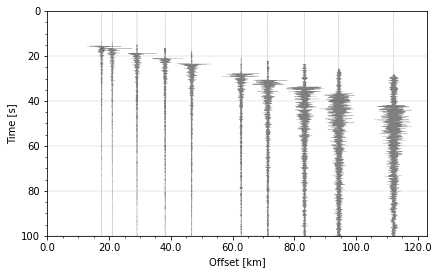

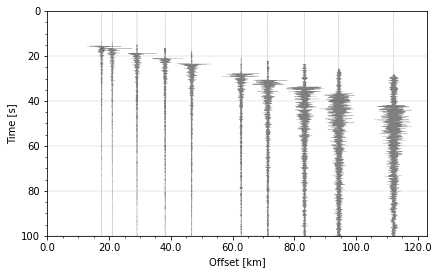

In [32]:
fig = plt.figure()
stream.plot(type='section', plot_dx=20e3, recordlength=100,
            time_down=True, linewidth=.25, grid_linewidth=.25, show=False, fig=fig)


In [36]:
# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in stream:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
